In [70]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import networkx as nx 
plt.rcParams['font.sans-serif'] = ['SimHei'] #中文字体

In [171]:
def DrawTraj(ax, x:np.ndarray, y:np.ndarray):
    """
    根据数据绘制轨迹点

    Parameters
    ----------
    x np.ndarray (input_len, num_vehicles, num_features)
    y np.ndarray (predict_len, num_vehicles, num_features)
    """
    assert x.shape[1] == y.shape[1], "x与y车数不一致"
    
    def get_exist_sample(s):
        #[seq_len, num_features] => [exist_len, 2]
        return s[(s[:,0] != 0)&(s[:,1] != 0),:2]

    color = random.sample(colors.cnames.keys(), x.shape[1])
    print(x.shape)
    for i in range(x.shape[1]):       
        traj = get_exist_sample(x[:,i,:])
        # traj = x[:,i,:]
        # traj = np.concatenate((get_exist_sample(x[:,i,:]), get_exist_sample(y[:,i,:])),axis=0)
        ax.scatter(traj[:,0], traj[:,1], c=color[i])

In [4]:
def DrawCars(fig, x:np.ndarray, y:np.ndarray):
    """
    根据数据绘制每一帧车辆位置点

    Parameters
    ----------
    x np.ndarray (input_len, num_vehicles, num_features)
    y np.ndarray (predict_len, num_vehicles, num_features)
    """
    assert x.shape[1] == y.shape[1], "x与y车数不一致"
    x_len = x.shape[0]
    y_len = y.shape[0]
    for i in range(x_len):
        ax = fig.add_subplot(2, x_len, i+1)
        f = x[i, :, :2] #取一帧
        m = x[i, : ,-1] > 0
        ax.scatter(f[m, 1],f[m, 0]) #方向

    for i in range(y_len):
        ax = fig.add_subplot(2, y_len, y_len+i+1)
        f = y[i, :, :2] #取一帧
        m = y[i, : ,-1] > 0
        ax.scatter(f[m, 1],f[m, 0]) #方向

In [156]:
from dataset.HighD_Dataset_DGL_1graph import HighD_Dataset
HighD_dataset = HighD_Dataset(X_len=10,X_step=4,Y_len=1,Y_step=1,diff=0,name='data_02',raw_dir='./dataset/')

In [157]:
graph, X, Y, _mask = HighD_dataset[1000]

torch.Size([10, 18, 4])


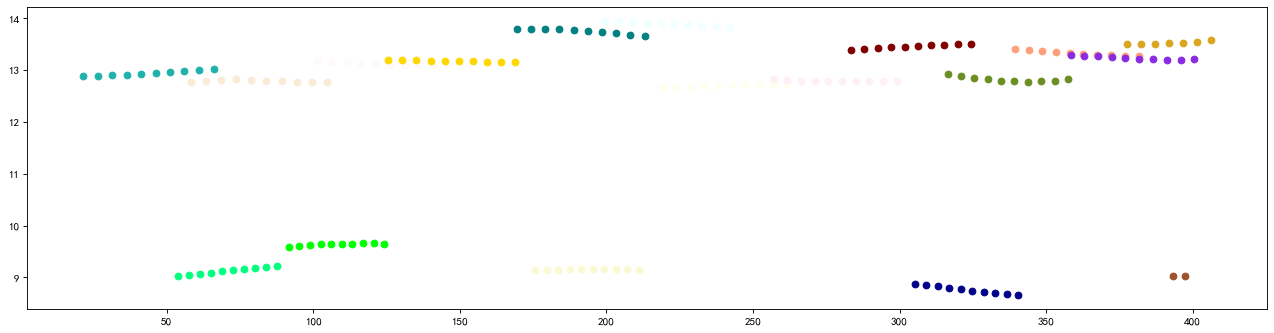

In [172]:
fig = plt.figure(figsize=(20,5),dpi=80) #按实际差不多是20:1
ax = fig.add_subplot()
DrawTraj(ax, X, Y)
plt.show()

In [131]:
X[0]

tensor([[ 9.3080e+01,  1.3070e+01, -3.7270e+01, -2.2000e-01],
        [ 3.4808e+02,  9.0000e+00, -2.5030e+01, -1.0000e-02],
        [ 3.0825e+02,  1.3030e+01, -4.8600e+01, -1.9000e-01],
        [ 3.7808e+02,  9.0500e+00, -2.5010e+01,  1.0000e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.5310e+01,  9.6100e+00, -3.0770e+01,  7.0000e-02],
        [ 1.0059e+02,  9.0900e+00, -2.8770e+01, -7.0000e-02]])

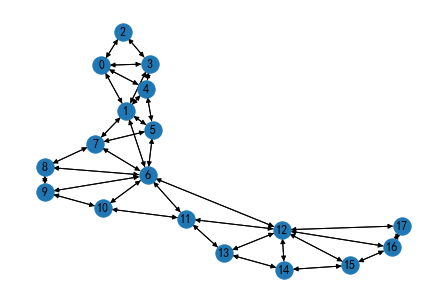

In [173]:
nx.draw(graph.to_networkx(), with_labels=True)
plt.show()